# Undirected Null Model Generation

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

import math

%matplotlib inline

In [2]:
#read in the network
G = nx.read_edgelist('largest_component_networkx_format.csv', comments='#',
                     create_using=nx.DiGraph(), 
                     delimiter=',', 
                     nodetype=int, 
                     encoding='utf-8')

## Basic Features of this Network

In [ ]:
#write some statistics to file for later use, these are statistics about the real netowrk

In [6]:
def persist_first_to_csv(centrality_dict, filename,columnname):
    curr = pd.DataFrame.from_dict(centrality_dict, orient="index", columns = [columnname])
    curr.to_csv(filename)
    
    
groupname = "RealNetwork"

clustering_filename = "{}_avg_clustering.csv".format(groupname)

apl_filename = "{}_apl.csv".format(groupname)


betweenness_cen_pd = "{}_betweenness_cen_df.csv".format(groupname)    
clustering_pd = "{}_clustering_df.csv".format(groupname)

filename = "RealNetwork"
G = nx.read_edgelist("largest_component_networkx_format.csv", comments='#',
                     create_using=nx.DiGraph(), 
                     delimiter=',', 
                     nodetype=int, 
                     encoding='utf-8')
print(nx.average_shortest_path_length(G))
print(nx.average_clustering(G))

persist_first_to_csv(nx.clustering(G),clustering_pd,filename)

persist_first_to_csv(nx.betweenness_centrality(G,k=None, normalized=True),betweenness_cen_pd,filename)

0.0012293584044826328
0.009608690028807564


In [7]:
print(nx.average_shortest_path_length(G))

0.0012293584044826328


In [8]:
print(nx.average_clustering(G))

0.009608690028807564


# Plotting Betweenness 

In [9]:
#get degree as a dictionary
deg_dict = dict(G.degree)

In [14]:
#turn it into a dataframe
degrees = pd.DataFrame.from_dict(deg_dict, orient="index", columns = ["degree"])

Join this with the betweenness 


In [16]:
#read in the betweenness centrality of the real network
real_betweenness = pd.read_csv('RealNetwork_betweenness_cen_df.csv')

In [18]:
real_betweenness = real_betweenness.set_index("Unnamed: 0")

In [19]:
#make it a dataframe with degrees
real_betweenness = pd.merge(real_betweenness, degrees, left_index=True, right_index=True)

In [37]:
real_betweenness


,RealNetwork,degree
1385933370090209280,0.0,1
158095776,0.0,18
1416535505454338050,0.0,2
1604931252,0.0,39
544695802,0.0,1
...,...,...
77596220,0.0,1
891058415195303939,0.0,1
1095768409449459712,0.0,1
881426857,0.0,1


In [21]:
#read in all the files from the null models
all_betweenness_files = ['Group1_betweenness_cen_df.csv', 'Group2_betweenness_cen_df.csv', 'Group3_betweenness_cen_df.csv', 'Group4_betweenness_cen_df.csv','Group5_betweenness_cen_df.csv']
all_betweenness_dfs = []
for file in all_betweenness_files:
    all_betweenness_dfs.append(pd.read_csv(file))

for df in all_betweenness_dfs:
    df = df.set_index("Unnamed: 0")
    real_betweenness = pd.merge(real_betweenness, df, left_index=True, right_index=True)

In [22]:
real_betweenness


,RealNetwork,degree,Undirected_Unweighted_Random_Null_Model_0,Undirected_Unweighted_Random_Null_Model_1,Undirected_Unweighted_Random_Null_Model_10,Undirected_Unweighted_Random_Null_Model_100,Undirected_Unweighted_Random_Null_Model_101,Undirected_Unweighted_Random_Null_Model_102,Undirected_Unweighted_Random_Null_Model_103,Undirected_Unweighted_Random_Null_Model_104,...,Undirected_Unweighted_Random_Null_Model_990,Undirected_Unweighted_Random_Null_Model_991,Undirected_Unweighted_Random_Null_Model_992,Undirected_Unweighted_Random_Null_Model_993,Undirected_Unweighted_Random_Null_Model_994,Undirected_Unweighted_Random_Null_Model_995,Undirected_Unweighted_Random_Null_Model_996,Undirected_Unweighted_Random_Null_Model_997,Undirected_Unweighted_Random_Null_Model_998,Undirected_Unweighted_Random_Null_Model_999
1385933370090209280,0.0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
158095776,0.0,18,0.000869,0.001721,0.001887,0.001481,0.002587,0.001578,0.001336,0.001792,...,0.001663,0.001260,0.001615,0.002311,0.001441,0.001348,0.001526,0.002307,0.002042,0.002205
1416535505454338050,0.0,2,0.000224,0.000005,0.000010,0.000224,0.000000,0.000224,0.000000,0.000224,...,0.000224,0.000014,0.000000,0.000005,0.000007,0.000224,0.000224,0.000224,0.000224,0.000224
1604931252,0.0,39,0.004742,0.004147,0.004424,0.005754,0.005038,0.005548,0.003561,0.005015,...,0.004947,0.004582,0.004330,0.005047,0.005206,0.004900,0.004669,0.004168,0.004576,0.004553
544695802,0.0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77596220,0.0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
891058415195303939,0.0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1095768409449459712,0.0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
881426857,0.0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [23]:
#drop the real network betweenness to get all the data for the random ones with degrees
random_betweenness = real_betweenness.drop('RealNetwork',axis = 1)

In [24]:
random_betweenness


,degree,Undirected_Unweighted_Random_Null_Model_0,Undirected_Unweighted_Random_Null_Model_1,Undirected_Unweighted_Random_Null_Model_10,Undirected_Unweighted_Random_Null_Model_100,Undirected_Unweighted_Random_Null_Model_101,Undirected_Unweighted_Random_Null_Model_102,Undirected_Unweighted_Random_Null_Model_103,Undirected_Unweighted_Random_Null_Model_104,Undirected_Unweighted_Random_Null_Model_105,...,Undirected_Unweighted_Random_Null_Model_990,Undirected_Unweighted_Random_Null_Model_991,Undirected_Unweighted_Random_Null_Model_992,Undirected_Unweighted_Random_Null_Model_993,Undirected_Unweighted_Random_Null_Model_994,Undirected_Unweighted_Random_Null_Model_995,Undirected_Unweighted_Random_Null_Model_996,Undirected_Unweighted_Random_Null_Model_997,Undirected_Unweighted_Random_Null_Model_998,Undirected_Unweighted_Random_Null_Model_999
1385933370090209280,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
158095776,18,0.000869,0.001721,0.001887,0.001481,0.002587,0.001578,0.001336,0.001792,0.001241,...,0.001663,0.001260,0.001615,0.002311,0.001441,0.001348,0.001526,0.002307,0.002042,0.002205
1416535505454338050,2,0.000224,0.000005,0.000010,0.000224,0.000000,0.000224,0.000000,0.000224,0.000009,...,0.000224,0.000014,0.000000,0.000005,0.000007,0.000224,0.000224,0.000224,0.000224,0.000224
1604931252,39,0.004742,0.004147,0.004424,0.005754,0.005038,0.005548,0.003561,0.005015,0.005258,...,0.004947,0.004582,0.004330,0.005047,0.005206,0.004900,0.004669,0.004168,0.004576,0.004553
544695802,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77596220,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
891058415195303939,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1095768409449459712,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
881426857,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [25]:
#get the average
random_betweenness['average_node_betweenness'] = random_betweenness.mean(axis=1)

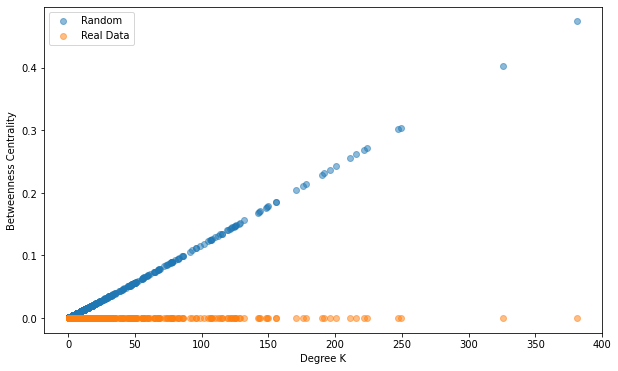

In [26]:
#plot the real katz vs the random betweenness
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(x = random_betweenness['degree'], y = random_betweenness ['average_node_betweenness'],  label = "Random", alpha = 0.5)
ax.scatter(x = real_betweenness['degree'], y = real_betweenness['RealNetwork'], label = "Real Data", alpha = 0.5)

plt.xlabel("Degree K")
plt.ylabel("Betweenness Centrality")
plt.legend(loc="upper left")

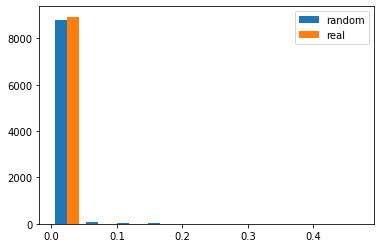

In [27]:
#plot it in a histogram
plt.hist([random_betweenness['average_node_betweenness'], real_betweenness['RealNetwork']],label=['random', 'real'])
plt.legend(loc='upper right')
plt.show()

In [29]:
#get the mean and variance of the clusetering for the null models
import numpy
all_files = ['Group1_avg_clustering.csv', 'Group2_avg_clustering.csv','Group3_avg_clustering.csv','Group4_avg_clustering.csv','Group5_avg_clustering.csv']
clustering_vals = []
for file in all_files:
    f = open(file, "r")
    clustering_vals.extend(f.readlines())

for i in range(len(clustering_vals)):
    clustering_vals[i] = float(clustering_vals[i])
    
arr = numpy.array(clustering_vals)

print("Mean: {}".format(arr.mean()))
print("Variance: {}".format(arr.std()))


Mean: 0.019569634101227626
Variance: 0.0010714098235888208


In [30]:
#get the mean and variance of the apl for the null models
import numpy
all_files = ['Group1_apl.csv', 'Group2_apl.csv','Group3_apl.csv','Group4_apl.csv','Group5_apl.csv']
clustering_vals = []
for file in all_files:
    f = open(file, "r")
    clustering_vals.extend(f.readlines())

for i in range(len(clustering_vals)):
    clustering_vals[i] = float(clustering_vals[i])
    
arr = numpy.array(clustering_vals)

print("Mean: {}".format(arr.mean()))
print("Variance: {}".format(arr.std()))

Mean: 3.2812074590424047
Variance: 1.4663846749255018
